# Setup

In [1]:
!pip install ijson
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import json
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!ls drive/MyDrive/
!cd /content/drive/MyDrive/CIS 545 Project

'10.10 EAS Annotated Bib.gdoc'
'11.17 eas discussion post.gdoc'
'11.18 Mixing project.logicx.zip'
'11.1 Communicating with the Public Outline.gdoc'
'11.27 Communicating with the Public Draft.gdoc'
'1.13 Basic Reasoning Structure.gdoc'
'12.15 Reflection Journal.gdoc'
'121 Sesh Questions.gdoc'
'12.24 Writing On Demand.gdoc'
'1.25 Chapter 6-8 Outlines.gdoc'
'1.25 chapter 7-8 outlines.gdoc'
'1.25 Testing and Evaluating Proposition.gdoc'
'1.27 logical fallacies.gdoc'
 16dScCbDLwoP5N5jK8SnNyCHnZ6PjjCFf
'2022 College Pack List.gdoc'
'2.10 Zeta Date Night.gdoc'
'2.12 Rhetorical Outline.gdoc'
'2.12 White Paper Logical Outline.gdoc'
'2.15 Rhetorical Outline.gdoc'
'2.15 White Paper Outline.gdoc'
'2.3 Final Book Outline.gdoc'
'2.3 Rhetorical Outline.gdoc'
'2.3 Rhetorical Outline Structure.gdoc'
'2.3 White Paper.gdoc'
'2.6 White Paper Proposal.gdoc'
'2.8 Collaborate White Paper Exercise Damaging.gdoc'
'4.2 photoshoot'
'8.13.22 resume.docx'
'9.15 hunt'
'9.9.21 SDP Stats.gdoc'
'Annotated Bibliography

In [4]:
ls

drive/  sample_data/


In [5]:
####    Read in the data and saving a chunk of it for easy access
import pandas as pd
flag = False
if flag:
  df = pd.DataFrame()
  i = 0

  for chunk in pd.read_json('arxiv-metadata-oai-snapshot.json', lines=True, chunksize=10000):
    i += 1
    if i % 13 == 0:
      df = df.append(chunk)
  df.to_csv('smaller_data.csv', index=False)

In [6]:
import os
os.chdir("/content/drive/MyDrive")
df = pd.read_csv('smaller_data.csv')

<ipython-input-6-21d792bc2a3c>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('smaller_data (2).csv')


In [7]:
####    Read in the data for use
# df = pd.read_csv('smaller_data (2).csv')

In [8]:
df.head()

,id,submitter,authors,title,comments,journal-ref,report-no,categories,abstract,versions,update_date,authors_parsed,year_month,abstract_cleaned,sentiment_score,first_author
0,904.3334,Andrew R. Zentner,Andrew P. Hearin and Andrew R. Zentner (Univer...,The Influence of Galaxy Formation Physics on W...,"34 Pages, 8 Figures, Submitted for Publication...","JCAP 0904:032,2009",NaN,astro-ph.CO astro-ph.GA,"Forthcoming projects such as the DES, a JDEM...","[{'version': 'v1', 'created': 'Tue, 21 Apr 200...",2010-01-15,"[['Hearin', 'Andrew P.', '', 'University of Pi...",2010-01-01,Forthcoming project DES JDEM LSST aim measure ...,0.037976,Hearin Andrew P. University of Pittsburgh
1,904.3335,Kim Nilsson,"Kim K. Nilsson, Klaus Meisenheimer (Eds), Nich...",Understanding Lyman-alpha emitters,"Workshop summary of the ""Understanding Lyman-a...",NaN,NaN,astro-ph.CO,This publication contains the conference sum...,"[{'version': 'v1', 'created': 'Tue, 21 Apr 200...",2015-05-13,"[['Nilsson', 'Kim K.', '', 'Eds'], ['Meisenhei...",2015-05-01,This publication contains conference summary U...,0.105636,Nilsson Kim K. Eds
2,904.3336,Althea Moorhead,"Althea V. Moorhead, Eric B. Ford",Type II migration of planets on eccentric orbits,"7 pages, 7 figures, submitted to ApJ",NaN,NaN,astro-ph.EP,The observed extrasolar planets possess both...,"[{'version': 'v1', 'created': 'Tue, 21 Apr 200...",2009-04-23,"[['Moorhead', 'Althea V.', ''], ['Ford', 'Eric...",2009-04-01,observed extrasolar planet posse large mass me...,0.017752,Moorhead Althea V.
3,904.3337,Luc Marleau,Merlin C. Davies and Luc Marleau,Skyrmion vibrational energies with a generaliz...,"12 pages, 8 figures","Phys.Rev.D79:074003,2009",NaN,hep-ph,We study various properties of a one paramet...,"[{'version': 'v1', 'created': 'Tue, 21 Apr 200...",2009-11-18,"[['Davies', 'Merlin C.', ''], ['Marleau', 'Luc...",2009-11-01,We study various property one parameter mass t...,0.094444,Davies Merlin C.
4,904.3338,Feng-Kun Guo,"Feng-Kun Guo, Christoph Hanhart, Ulf-G. Mei{\s...",Implications of heavy quark spin symmetry on h...,"4 pages, 2 figures","Phys.Rev.Lett.102:242004,2009","FZJ-IKP-TH-2009-13, HISKP-TH-09/16",hep-ph hep-ex,"In recent years, many heavy mesons and charm...","[{'version': 'v1', 'created': 'Tue, 21 Apr 200...",2009-06-19,"[['Guo', 'Feng-Kun', ''], ['Hanhart', 'Christo...",2009-06-01,recent year many heavy meson charmonia observe...,0.038176,Guo Feng-Kun


# Preprocessing and EDA

In [9]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
stop_words = set(stopwords.words('english'))                # initialize set of stopwords. ie: “the”, “is”,“and”

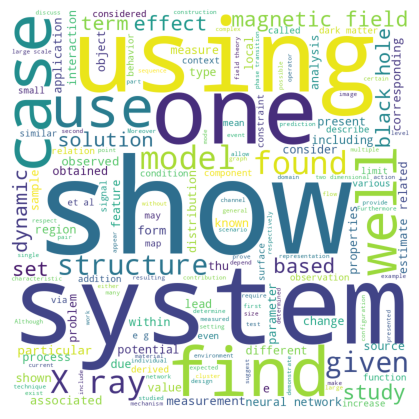

In [11]:
# Creating a word cloud for the most popular words in the abstract
abstract = ' '.join(df['abstract'])

tokens = abstract.split()
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
text = ' '.join(filtered_tokens)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text)

plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

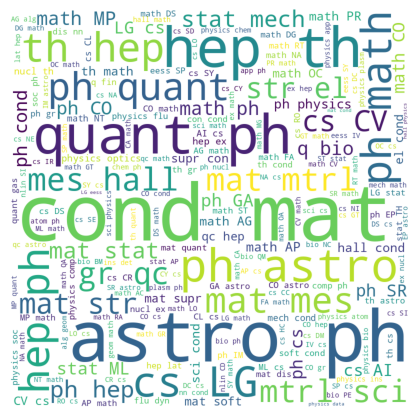

In [12]:
# Creating a word cloud for the most popular categories
categories = ' '.join(df['categories'])

tokens = categories.split()
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
text = ' '.join(filtered_tokens)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text)

plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [13]:
# Formatting the date so that it appears as a datetime object and only the year and month is present
df["update_date"] = pd.to_datetime(df["update_date"], format='%Y-%m-%d')
df['year_month'] = df['update_date'].dt.strftime('%Y-%m')
df['year_month'] = pd.to_datetime(df['year_month'])

In [14]:
# Grouping all the rows by year and month to analyse this data
df_occurence = df.groupby(['year_month']).count()
df_occurence = df_occurence[['id']].reset_index()
df_occurence = df_occurence.rename(columns={'id': 'Count'})

In [15]:
df_occurence

,year_month,Count
0,2007-05-01,12060
1,2007-06-01,217
2,2007-07-01,171
3,2007-08-01,119
4,2007-09-01,87
...,...,...
186,2022-11-01,892
187,2022-12-01,715
188,2023-01-01,726
189,2023-02-01,708


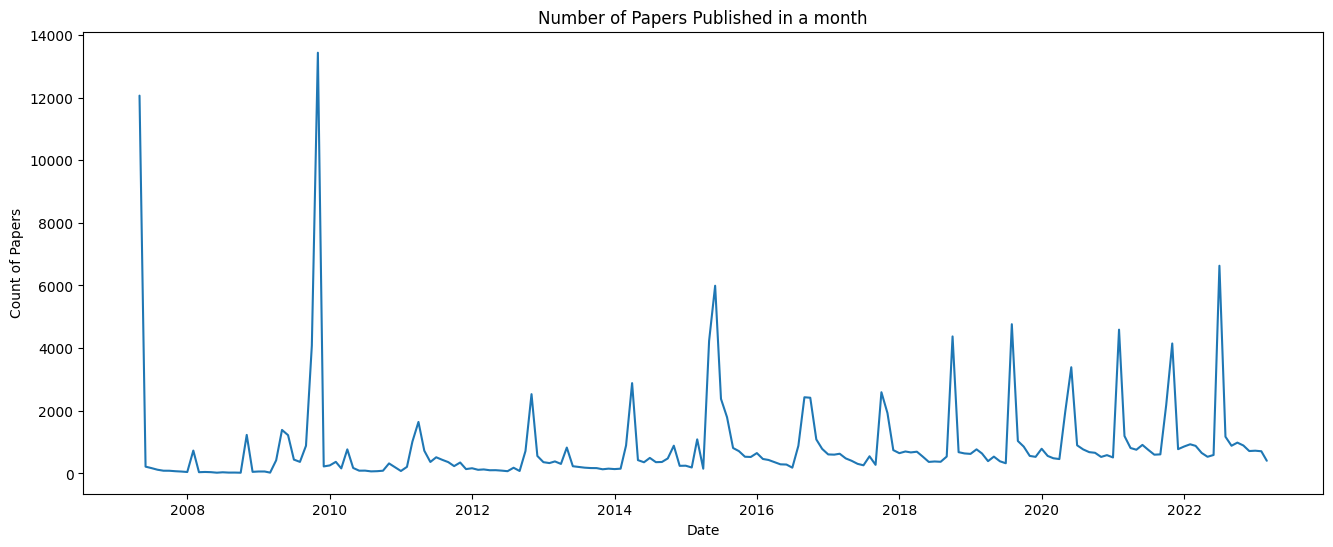

In [16]:
# Grouped the papers by their year and month
# We observe that this subset of data is very volatile. 
# There are large spikes in the publishing of papers. However, this is most likely due to the fact our data is only a smaller subset of the entire dataset
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)

sns.set_style('darkgrid')

sns.lineplot(x='year_month', y='Count', data=df_occurence)

plt.title('Number of Papers Published in a month')
plt.xlabel('Date')
plt.ylabel('Count of Papers')
plt.show()

In [17]:
# We split the list of categories for each paper into its own row so we can analyse the categories of papers
df_categories_years = df[['categories', 'year_month']]
df_categories_years = df_categories_years.assign(Split=df_categories_years['categories'].str.split())
df_categories_years = df_categories_years.explode('Split')
df_categories_years.reset_index(inplace=True, drop=True)
df_categories_years.drop(['categories'], axis=1, inplace=True)
df_categories_years = df_categories_years.rename(columns={'Split': 'categories'})

In [18]:
# Finding the 10 most popular categories in which papers were published
value_counts = df_categories_years['categories'].value_counts()
top_values = value_counts.nlargest(10).index.tolist()
filtered_df = df_categories_years[df_categories_years['categories'].isin(top_values)].reset_index(drop=True)

In [19]:
# Showing papers that belong to the top 10 categories and when they were published
filtered_df['size'] = filtered_df.groupby(['year_month', 'categories'])['year_month'].transform('size')
filtered_df

,year_month,categories,size
0,2009-11-01,hep-ph,688
1,2009-06-01,hep-ph,55
2,2015-05-01,cond-mat.str-el,245
3,2015-05-01,quant-ph,348
4,2009-11-01,hep-ph,688
...,...,...,...
96670,2011-08-01,quant-ph,43
96671,2009-11-01,quant-ph,3718
96672,2007-05-01,quant-ph,3563
96673,2007-05-01,quant-ph,3563


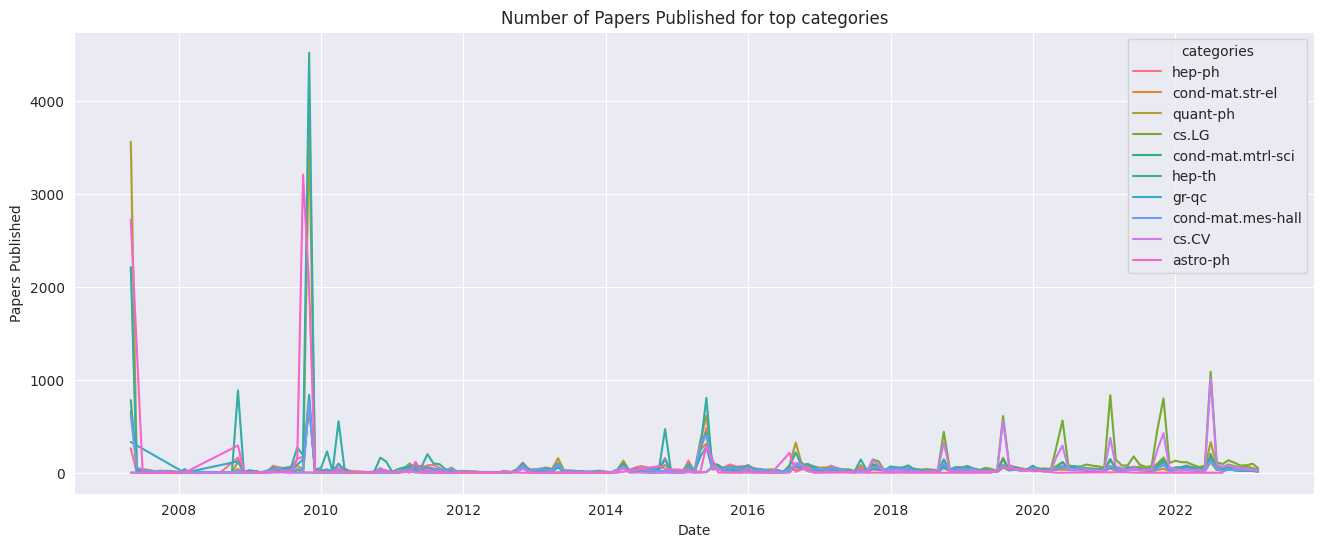

In [20]:
# This plot shows how the number of papers published in each of the top 10 categories changes over time
# We observe that it is indeed very volatile which is consistent with the previous graph showing when papers were published
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
ax.set_title('Number of Papers Published for top categories')
ax.set_xlabel('Date')
ax.set_ylabel('Papers Published')

sns.lineplot(data=filtered_df, x="year_month", y='size', hue="categories", palette='husl', ax = ax)
plt.show()

# Sentiment Analysis

**Motivation**: We are interested in the sentiment that authors and their works may contain on the platform. 

Although ARXIV is a collection of research articles, who knows what hidden sentiments and patterns we can uncover through an analysis of the works. Do some authors write more positive and less impartial than others? Do some authors produce work that is consistently more negative? Could we uncover possible bias?

### I. Preparation

In [21]:
#####   import required libraries

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

import pandas as pd
from textblob import TextBlob
import re

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [47]:
####  Remove stopwords
def filter_sentence(sentence, stop_words):
  word_tokens = word_tokenize(sentence)                                               # converts the words in word_tokens to lower case and \
                                                                                      # then check whether they are present in stop_words or not

  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]         # with no lower case conversion
  
  filtered_sentence = []
  
  for w in word_tokens:                                                                # filter sentence
    if w not in stop_words:
        filtered_sentence.append(w)

  sent = ''
  for i in range(len(filtered_sentence) - 1):                                                                            # combine words of filtered sentence to one string
    sent += filtered_sentence[i]
    sent += ' '
  sent += filtered_sentence[i+1]
  return sent

# establish set of stop words
stop_words = set(stopwords.words('english'))

# remove stop words
df['abstract_cleaned'] = df['abstract'].apply(lambda x: filter_sentence(x, stop_words))

In [48]:
####  Remove prepositions and non-alphanumeric characters

pattern = r'\b(a|an|the|in|on|at)\b|[^a-zA-Z0-9 ]+'
df['abstract_cleaned'] = df['abstract_cleaned'].apply(lambda x: re.sub(pattern, '', x, flags=re.IGNORECASE))

In [49]:
####  Lemmatize text: converting each word to its base form for preparation in sentiment analysis
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lem_text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return lem_text

df['abstract_cleaned'] = df['abstract_cleaned'].apply(lemmatize_text)

### II. Sentiment Processing

Now we will engage in some sentiment processing using *TextBlob*.

What is TextBlob? 

TextBlob is a Python library for processing textual data. It's built-in with a large dictionary of positive and negative words, as well as semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. 

It can return the polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [50]:
df['authors_parsed_new'] = df['authors_parsed'].apply(lambda x: eval(x))    # convert the string format into a format of lists of lists

In [51]:
####  Sentiment analysis

# function to get sentiment polarity score
def get_sentiment_polarity(text):
    blob = TextBlob(text)                   # TextBlob sentiment: analysis and polarity
    sentiment = blob.sentiment.polarity     # we want polarity here
    return sentiment

# Apply sentiment analysis to data
df['sentiment_score'] = df['abstract_cleaned'].apply(get_sentiment_polarity)

# filter dataframe
paper_sentiments_df = df[['authors_parsed_new', 'abstract_cleaned', 'sentiment_score']]
paper_sentiments_df['first_author'] = df['authors_parsed_new'].apply(lambda x: ' '.join(x[0]))    # clean up first_author column
paper_sentiments_df

<ipython-input-51-57b221345824>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paper_sentiments_df['first_author'] = df['authors_parsed_new'].apply(lambda x: ' '.join(x[0]))    # clean up first_author column


,authors_parsed_new,abstract_cleaned,sentiment_score,first_author
0,"[[Hearin, Andrew P., , University of Pittsburg...",Forthcoming project DES JDEM LSST aim measure ...,0.037976,Hearin Andrew P. University of Pittsburgh
1,"[[Nilsson, Kim K., , Eds], [Meisenheimer, Klau...",This publication contains conference summary U...,0.105636,Nilsson Kim K. Eds
2,"[[Moorhead, Althea V., ], [Ford, Eric B., ]]",observed extrasolar planet posse large mass me...,0.017752,Moorhead Althea V.
3,"[[Davies, Merlin C., ], [Marleau, Luc, ]]",We study various property one parameter mass t...,0.094444,Davies Merlin C.
4,"[[Guo, Feng-Kun, ], [Hanhart, Christoph, ], [M...",recent year many heavy meson charmonia observe...,0.038176,Guo Feng-Kun
...,...,...,...,...
169995,"[[Maslov, Dmitri, ], [Dueck, Gerhard W., ]]",We present nbit Toffoli gate quantum circuit b...,0.168333,Maslov Dmitri
169996,"[[Ranjani, S. Sree, ], [Kapoor, A. K., ], [Pan...",We apply quantum HamiltonJacobi formalism natu...,-0.126190,Ranjani S. Sree
169997,"[[Bacciagaluppi, Guido, ]]",I review formalism classical extension quantum...,0.077778,Bacciagaluppi Guido
169998,"[[Ambainis, Andris, ], [Iwama, Kazuo, ], [Kawa...",oracle identification problem OIP given set S ...,0.078361,Ambainis Andris


In [52]:
####    now we have a cleaned list of authors, a cleaned abstract, a sentiment score from that abstract, and a first author for every paper!

### III. Preliminary Sentiment Visualization

**A.** We want to know: are there any patterns or trends in the sentiment of articles, spread across subject category?

In [53]:
df_sentiment_category = df[['categories', 'sentiment_score']]                                                   # filter columns
df_sentiment_category = df_sentiment_category.assign(Split=df_sentiment_category['categories'].str.split())     # there may be multiple categories, so split them
df_sentiment_category = df_sentiment_category.explode('Split')                                                  # make one row for each category, for each paper
df_sentiment_category.reset_index(inplace=True, drop=True)                                                      # reset the index of the datatable
df_sentiment_category.drop(['categories'], axis=1, inplace=True)                                                # drop the categories column, in-place
df_sentiment_category = df_sentiment_category.rename(columns={'Split': 'categories'})                           # rename column
value_counts = df_sentiment_category['categories'].value_counts()                                               # get the counts of each category

top_values = value_counts.nlargest(10).index.tolist()                                                           # convert the counts to a list (method of finding top categories)

df_sentiment_category = df_sentiment_category[df_sentiment_category['categories'].isin(top_values)].reset_index(drop=True)

In [54]:
# Sentiment for each category
df_sentiment_category

,sentiment_score,categories
0,0.094444,hep-ph
1,0.038176,hep-ph
2,0.320536,cond-mat.str-el
3,0.320536,quant-ph
4,0.114550,hep-ph
...,...,...
96670,0.168333,quant-ph
96671,-0.126190,quant-ph
96672,0.077778,quant-ph
96673,0.078361,quant-ph


This shows the sentiment score for the top 10 categories. All of them are relatively neutral in stance and slightly positive. This makes sense because academic papers should be more serious in tone.


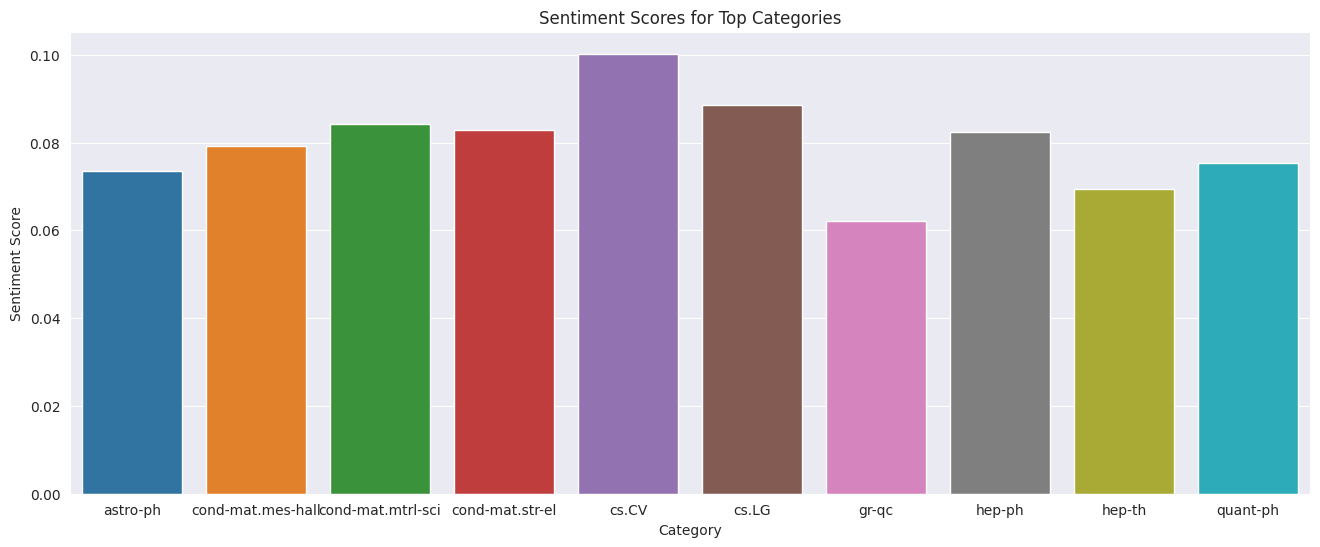

In [55]:
sentiment_scores = df_sentiment_category.groupby(['categories']).mean().reset_index()

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111)
ax.set_title('Sentiment Scores for Top Categories')
sns.barplot(x=sentiment_scores['categories'], y=sentiment_scores['sentiment_score'], ax=ax)
ax.set_xlabel('Category')
ax.set_ylabel('Sentiment Score')
plt.show()

In [56]:
#### Analysis:

# Every category is relatively close in sentiment. There is no one category that is extremely positive or extremely negative in sentiment.
# This makes sense, considering we are dealing with a database of scholarly articles.
# It is interesting, however, to consider what may make the 'cs.CV' column, for example, higher in sentiment than the 'astro-ph' column.

# Note: 'cs.CV' stands for 'Computer Vision and Pattern Recognition', while 'astro-ph' stands for 'Astrophysics'.

# Although the difference is slight, this may give us insight into the TextBlob polarity model.
# There must certain buzzwords in the Computer Vision and Pattern Recognition literature that incite more sentiment than those in Astrophysics.
# Could TextBlob view words that have to do with technology with higher sentiment?

**B.** We want to know: Who are the authors who hold the most weight on the database? This will help with further analysis into the sentiment and subjectivity of any given author, for the more articles they have written, the more data will have to base their sentiment and subjectivity on.

In [57]:
from collections import Counter
all_authors = []
for ind, row in df.iterrows():
  list_authors = eval(df['authors_parsed'][ind])
  for author in list_authors:
    all_authors.append(author)

Text(0, 0.5, 'Count of Papers')

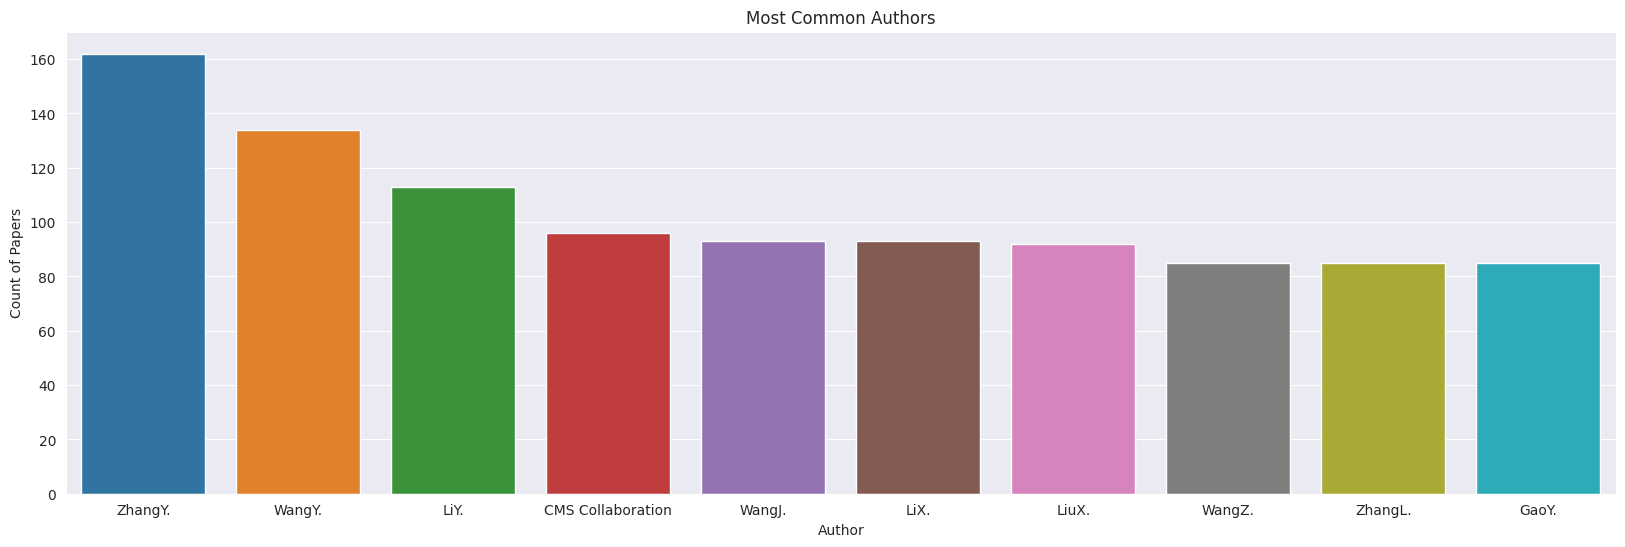

In [58]:
list_counts = Counter(map(tuple, all_authors))

most_common = list_counts.most_common(10)

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)

x = [''.join(item[0]) for item in most_common]
y = [item[1] for item in most_common]

sns.barplot(x=x, y=y, errorbar=None)


plt.title('Most Common Authors')
plt.xlabel('Author')
plt.ylabel('Count of Papers')

In [36]:
#### Analysis:

# Presence of Collaborations: pump out many articles. 
# Hypothesis: for any given collaboration, sentiment and subjectivity will both be close to 0 since a collaboration is a collection of many different authors/opinions

# Likely confounding variable: multiple people may have the same first initial and last name.
# Deal with this confounding in next section

Continuing to Subjectivity

In [59]:
####  Subjectivity analysis

# function to get sentiment subjectivity score
def get_sentiment_subjectivity(text):
    blob = TextBlob(text)                   # TextBlob sentiment: analysis and subjectivity
    sentiment = blob.sentiment.subjectivity     # we want subjectivity here
    return sentiment

# Apply sentiment analysis to data
df['subjectivity_score'] = df['abstract_cleaned'].apply(get_sentiment_subjectivity)

df

# filter dataframe
df['first_author'] = df['authors_parsed_new'].apply(lambda x: ' '.join(x[0]))
paper_sentiments_df = df[['authors_parsed_new', 'first_author', 'abstract_cleaned', 'sentiment_score', 'subjectivity_score']]
paper_sentiments_df


# Now we have the first author of every article, as well as the sentiment and subjectivity of the abstract!

,authors_parsed_new,first_author,abstract_cleaned,sentiment_score,subjectivity_score
0,"[[Hearin, Andrew P., , University of Pittsburg...",Hearin Andrew P. University of Pittsburgh,Forthcoming project DES JDEM LSST aim measure ...,0.037976,0.435238
1,"[[Nilsson, Kim K., , Eds], [Meisenheimer, Klau...",Nilsson Kim K. Eds,This publication contains conference summary U...,0.105636,0.430955
2,"[[Moorhead, Althea V., ], [Ford, Eric B., ]]",Moorhead Althea V.,observed extrasolar planet posse large mass me...,0.017752,0.526681
3,"[[Davies, Merlin C., ], [Marleau, Luc, ]]",Davies Merlin C.,We study various property one parameter mass t...,0.094444,0.447222
4,"[[Guo, Feng-Kun, ], [Hanhart, Christoph, ], [M...",Guo Feng-Kun,recent year many heavy meson charmonia observe...,0.038176,0.473634
...,...,...,...,...,...
169995,"[[Maslov, Dmitri, ], [Dueck, Gerhard W., ]]",Maslov Dmitri,We present nbit Toffoli gate quantum circuit b...,0.168333,0.471667
169996,"[[Ranjani, S. Sree, ], [Kapoor, A. K., ], [Pan...",Ranjani S. Sree,We apply quantum HamiltonJacobi formalism natu...,-0.126190,0.478571
169997,"[[Bacciagaluppi, Guido, ]]",Bacciagaluppi Guido,I review formalism classical extension quantum...,0.077778,0.138889
169998,"[[Ambainis, Andris, ], [Iwama, Kazuo, ], [Kawa...",Ambainis Andris,oracle identification problem OIP given set S ...,0.078361,0.334034


In [60]:
####  Finding the average sentiment of the 6 authors with the most publications

# show only top 6 authors
author_frequent_df = paper_sentiments_df[['first_author']].groupby(by='first_author').size().reset_index()    # get number of author publications
author_frequent_df[['first_author', 'count']] = author_frequent_df                                            # filter columns
author_frequent_df[['first_author', 'count']].sort_values(by='count', ascending=False)                        # sort by number of publications decr

# merge author_frequent_df (contains number of publications of each author) with paper_sentiments_df (contains sentiment of first author each paper)
# then group by first author and find the mean sentiment score
merged = pd.merge(author_frequent_df, paper_sentiments_df, on='first_author').groupby(by='first_author').mean().reset_index()   

# sort num_publications in decreasing order
author_sentiment_df = merged.sort_values(by='count', ascending=False).head(6)[['first_author', 'count', 'sentiment_score']]

# renaming columns
author_sentiment_df['avg_sentiment_score'] = author_sentiment_df['sentiment_score']
author_sentiment_df['num_publications'] = author_sentiment_df['count']

# filtering columns
author_sentiment_df = author_sentiment_df[['first_author', 'num_publications', 'avg_sentiment_score']]

author_sentiment_df
# author vs perceived sentiment: author sentiment score

<ipython-input-60-e0574c1c5617>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged = pd.merge(author_frequent_df, paper_sentiments_df, on='first_author').groupby(by='first_author').mean().reset_index()


,first_author,num_publications,avg_sentiment_score
16611,CMS Collaboration,96.0,0.071776
28,ATLAS Collaboration,74.0,0.096013
56047,Khrennikov Andrei,48.0,0.025269
60773,LHCb collaboration,35.0,0.117438
1010,Aerts Diederik,35.0,0.044111
47088,Hofmann Holger F.,33.0,0.093717


From this sentiment analysis, we can see the top 6 authors with the most publications are fairly impartial in sentiment, since each average sentiment score lies at around 0.

Note: we want to use the authors with the most publications for this analysis, since this will offer us the most robust analysis.

**C.** Let's visualize it with the top 50 authors with the most publications!

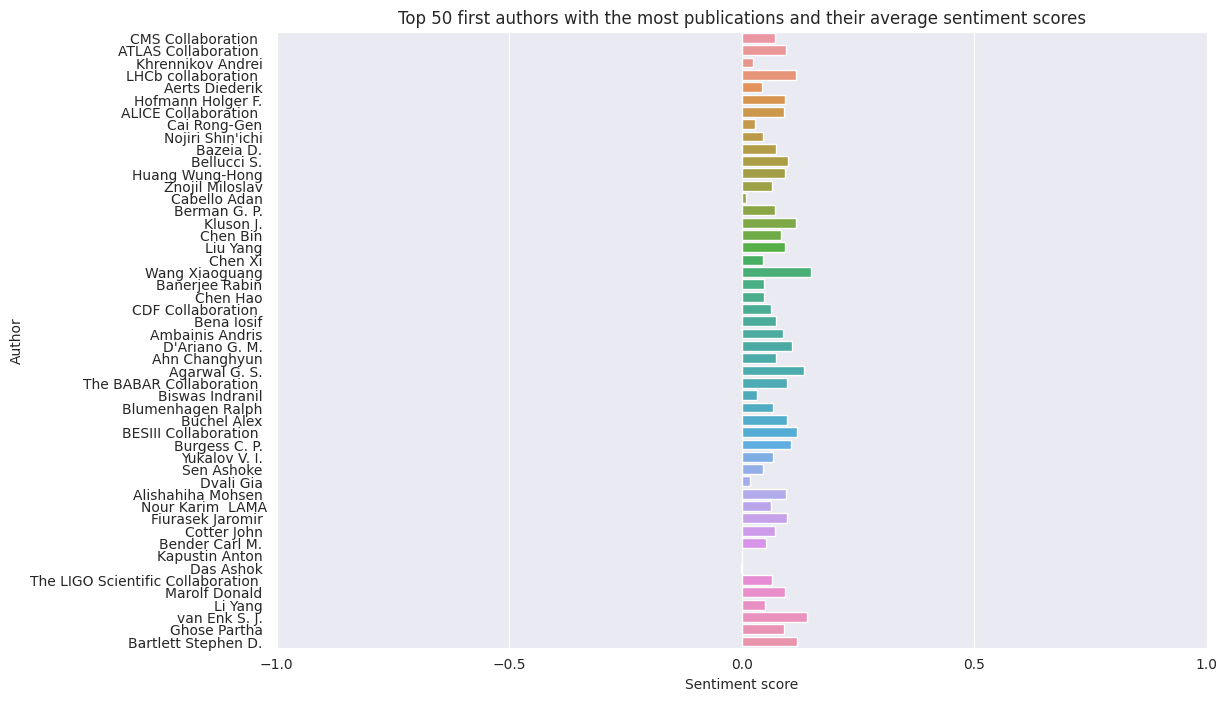

In [61]:
# sorting values again
author_sentiment_df = merged.sort_values(by='count', ascending=False).head(50)[['first_author', 'count', 'sentiment_score']]

# renaming/filtering columns
author_sentiment_df['avg_sentiment_score'] = author_sentiment_df['sentiment_score']
author_sentiment_df['num_publications'] = author_sentiment_df['count']

author_sentiment_df = author_sentiment_df[['first_author', 'num_publications', 'avg_sentiment_score']]

# graphing
sns.barplot(author_sentiment_df[['first_author', 'avg_sentiment_score']], x='avg_sentiment_score', y='first_author')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xticks((-1,-0.5,0,0.5,1))
plt.title('Top 50 first authors with the most publications and their average sentiment scores')
plt.xlabel('Sentiment score')
plt.ylabel('Author')
plt.show()

From this graph, we can see that the average sentiment of most of the top-producing authors is quite close to 0. This makes sense, thinking about our datasource, which is a collection of impartial research articles.

It is interesting to note authors Das Ashok, Kapustin Anton, and Cabello Adan, as their average sentiment score was exactly 0. This may indicate that the works of these authors are highly impartial in their wording.

One possible problem with this strategy is that we are using the average sentiment among each author. So, if an author wrote 2 articles, one with highly positive sentiment, and one with negative sentiment of an equal magnitude, then the resultant average sentiment would be 0. It is important to outline the shortcomings of this simple aggregation technique.

**D.** Now, we will find the average subjectivity of the top fifty authors with the most publications, similar to above.

<ipython-input-62-269760480d22>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged = pd.merge(author_frequent_df_2, paper_sentiments_df, on='first_author').groupby(by='first_author').mean().reset_index()


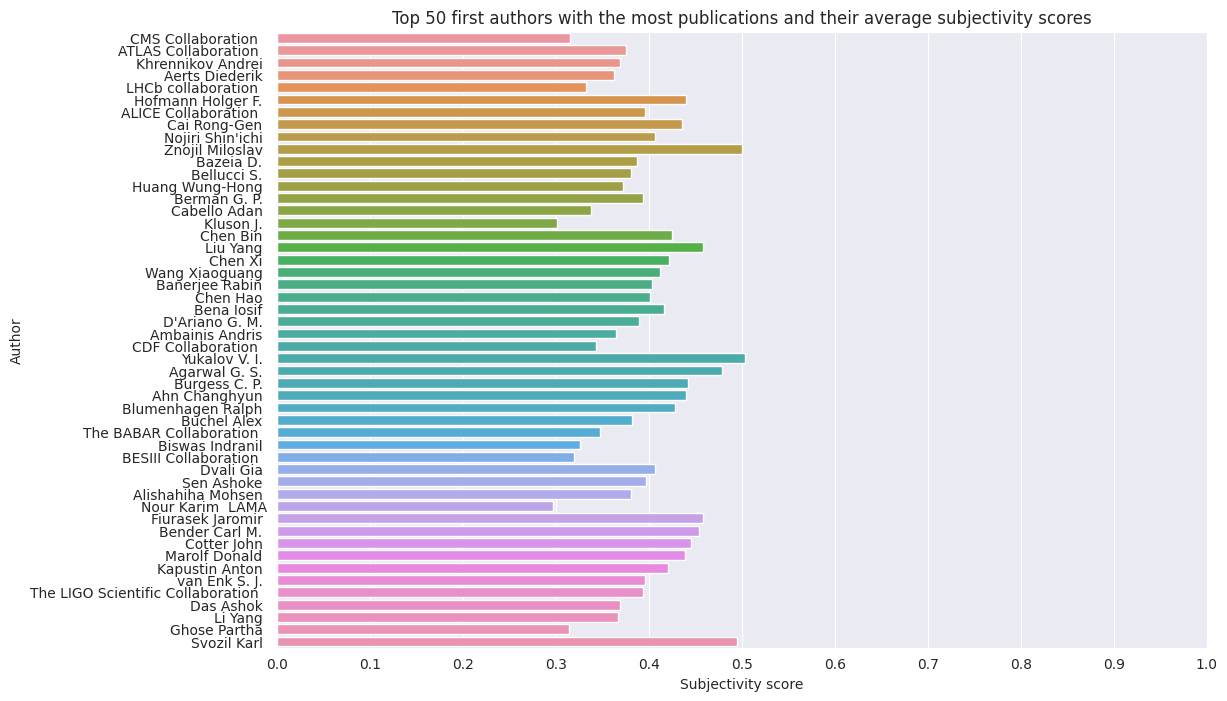

In [62]:
####  Finding the average subjectivity of the 50 authors with the most publications

# author_frequent_df_2: group the df by first_author
author_frequent_df_2 = paper_sentiments_df[['first_author']].groupby(by='first_author').size().reset_index()
author_frequent_df_2[['first_author', 'count']] = author_frequent_df_2    # filter columns
author_frequent_df_2[['first_author', 'count']].sort_values(by='count', ascending=False)    # sort values by num_publications decreasing

# merge num_publications and subjectivity scores
merged = pd.merge(author_frequent_df_2, paper_sentiments_df, on='first_author').groupby(by='first_author').mean().reset_index()
author_subjectivity_df = merged.sort_values(by=['count', 'subjectivity_score'], ascending=False).head(50)[['first_author', 'count', 'subjectivity_score']]

# rename columns
author_subjectivity_df['avg_subjectivity_score'] = author_subjectivity_df['subjectivity_score']
author_subjectivity_df['num_publications'] = author_subjectivity_df['count']

author_subjectivity_df = author_subjectivity_df[['first_author', 'num_publications', 'avg_subjectivity_score']]
# graphing
sns.barplot(author_subjectivity_df[['first_author', 'avg_subjectivity_score']], x='avg_subjectivity_score', y='first_author')
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.xticks((0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0))
plt.title('Top 50 first authors with the most publications and their average subjectivity scores')
plt.xlabel('Subjectivity score')
plt.ylabel('Author')
plt.show()
# author vs perceived sentiment: author sentiment score

As can be seen above, the top authors with the most publications are generally not that subjective. It is interesting to see how they vary however.

The ideal research article, for maximum impartiality, would have subjectivity score close to 0, as it would be devoid of personal opinion. Kluson J and Nour Karim are authors who have the lowest average subjectivity scores.

**E.** For fun, let's find the publishers of the least subjective articles. We need to know who to take with a grain of salt when reading these articles! 

In [63]:
author_frequent_df_2 = paper_sentiments_df[['first_author']].groupby(by='first_author').size().reset_index()
author_frequent_df_2[['first_author', 'count']] = author_frequent_df_2
author_frequent_df_2[['first_author', 'count']].sort_values(by='count', ascending=False)    # sort values by num_publications decreasing

merged = pd.merge(author_frequent_df_2, paper_sentiments_df, on='first_author').groupby(by='first_author').min().reset_index()
author_subjectivity_df = merged.sort_values(by=['count', 'subjectivity_score'], ascending=[False, True]).head(20)[['first_author', 'count', 'subjectivity_score']]

author_subjectivity_df['min_subjectivity_score'] = author_subjectivity_df['subjectivity_score']
author_subjectivity_df['num_publications'] = author_subjectivity_df['count']
author_subjectivity_df['first_author (most publications decreasing)'] = author_subjectivity_df['first_author']

In [64]:
author_subjectivity_df = author_subjectivity_df[['first_author (most publications decreasing)', 'min_subjectivity_score']]
author_subjectivity_df

,first_author (most publications decreasing),min_subjectivity_score
16611,CMS Collaboration,0.000000
28,ATLAS Collaboration,0.000000
56047,Khrennikov Andrei,0.000000
60773,LHCb collaboration,0.000000
1010,Aerts Diederik,0.107143
47088,Hofmann Holger F.,0.000000
21,ALICE Collaboration,0.136667
16818,Cai Rong-Gen,0.257143
78918,Nojiri Shin'ichi,0.000000
9869,Bellucci S.,0.000000


Conclusions: take the works written by authors on this list with a grain of salt and a hesitant mind!!

Overall, we can't fully claim that one author is more impartial than the other or to trust one author more than another based solely on this analysis. This is a good inflection point to really analyze how the TextBlob subjectivity score is constructed.

TextBlob calculates subjectivity by looking at the 'intensity'. Intensity determines if a word modifies the next word. So, if one author just used less modifiers, then they may appear to have a lower subjectivity score.

However, it is a good starting point to start generating hypotheses!

# Modeling

We aim to model the text in the papers' abstracts by running title generation/one line summarisation models on it. We will run a variety of other models on the abstracts to product interesting results.`


## Transformers

The first type of modeling we do is using the HuggingFace transformer library.
We install the transformer pipeline specialised on summarization, which uses the
`sshleifer/distilbart-cnn-12-6` model in order to compute results. We limit
summarization token size to be between 5 and 15 tokens to simulate titles. 

In [65]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.3 MB/s eta 0:00:00


In [66]:
from transformers import pipeline

summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [67]:
summarized = summarizer(df["abstract"].values.tolist()[:5], min_length=5, max_length=15)

# The summarisation

We run the summarizer on the first 5 abstracts for demonstration purposes. It takes about 11 seconds to run the model on one abstract, which is why we don't preprocess our entire dataset with 170000 rows with summarisers.

In [68]:
summarized

[{'summary_text': ' The evolution of the baryonic component of the Universe is'},
 {'summary_text': ' UnderstandingLyman-alpha Emitters conference held at the Max'},
 {'summary_text': ' The observed extrasolar planets possess both large masses (with a'},
 {'summary_text': ' We study various properties of a one parameter mass term for the'},
 {'summary_text': ' Heavy mesons and charmonia were observed which do not'}]

In [69]:
df["abstract"][:5]

0      Forthcoming projects such as the DES, a JDEM...
1      This publication contains the conference sum...
2      The observed extrasolar planets possess both...
3      We study various properties of a one paramet...
4      In recent years, many heavy mesons and charm...
Name: abstract, dtype: object

# Cosine Similarity

In order to measure the effectiveness of our models, we use the cosine similarity metric. Overall, there is a poor showing on the transformer. It rarely outputs full sentences and similarity scores peak at ~54% amongst our five samples.

It is possible that the summarizer is outputting too short of sentences to correctly categorise for similarity while accounting for stopwords and the like.
Paper abstracts generally contain a lot of heavily technical keywords as well as stopwords connecting them and assume a context that a pre-trained summarisation model is unlikely to have.

In [70]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

abstract = df["abstract"].values.tolist()[:5]
labels = [a[:20] for a in abstract]

summarized_text = list(map(lambda x: list(x.values())[0], summarized))
vectorizer = TfidfVectorizer()

def sim(a, b):
  tfidf = vectorizer.fit_transform([a,b])
  return ((tfidf * tfidf.T).A)[0,1]


print(sim("word", "word"))
for a, b in zip(abstract, summarized_text):
  print(sim(a, b))



1.0
0.5470540003534984
0.350226356075703
0.2581511794129284
0.5460998117124453
0.20577923387130845


# Latent Dirchlet Allocation (LDA) modeling

LDA is a technique used to topic model text. It is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions. 

In this case, we wanted to analyse the topics present in the abstracts so we 
decided to use LDA as a tool to classify the documents into topics.

We appropriately lemmatized and tokenized the abstracts before running the model on it.


In [71]:

documents = df["abstract"].values.tolist()[:10000]

import pandas as pd
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
tokenized_documents = [[lemmatizer.lemmatize(token) for token in word_tokenize(doc) if token not in stop_words] for doc in documents]

dictionary = corpora.Dictionary(tokenized_documents)

corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

Interestingly, the output of the LDA model ended up rela. This reinforces our observation above that the NLP techniques are not able to capture the subtleties and technical variety present in the abstract.

The topics captured reflect the general themes of the papers: scientific, related to physics and modeling. However, they are not particularly granular.

In [72]:
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, iterations=200)
for topic in lda_model.show_topics(num_topics=10, num_words=10,formatted=False):
    print(f'Topic {topic[0]}: {" ".join([word[0] for word in topic[1]])}')

Topic 0: . , network The state vortex We quantum field system
Topic 1: . , We The ) ( system In model result
Topic 2: , BH . BRST involution matroid Levy nanotube TM monodromy
Topic 3: . , We The ) model ( observation data also
Topic 4: subalgebras , $ utilization -algebra . Included holomorphic cyclic group
Topic 5: channel , . capacity fading SNe coding ) \cal interference
Topic 6: . , The field model We magnetic energy state effect
Topic 7: . , ( ) We $ group The theory field
Topic 8: , . ( ) We The galaxy star mass {
Topic 9: $ , . } { ) ( We The result


# NMF Modeling

NMF modeling is another technique invoking Non Negative Matrix Factorization. NMF (Non-Negative Matrix Factorization) is a type of unsupervised technique that does not rely on predefined labels for the topics the model will learn. Essentially, NMF breaks down high-dimensional vectors into a lower-dimensional form, also known as factorization or decomposition. Importantly, these lower-dimensional vectors are non-negative and their coefficients are non-negative as well.


This results in breaking down the text into the similar topics as observed above: mostly technical, physics concepts. We do see topics identified more clearly (Topic 5 is about quantum mechanics) and Topic 8 is about group algebras. However, the abstract also catches a lot of "boilerplate" text such as "we show that" which is common to research papers but not caught as stopwords/removed by standard preprocessing.


An interesting extension could be to add further preprocessing to the abstracts to retain the core topical information, and then perform topic modeling.

In [73]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
)
tfidfs = tfidf_vectorizer.fit_transform(documents)


def display_topics(H, W, feature_names):
    for topic_idx, topic in enumerate(H):
        print('\n',"Topic %d:" % (topic_idx))
        print("Top Words: "," ".join([feature_names[i] for i in topic.argsort()[:-10- 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:10]

nmf_model = NMF(n_components=20, l1_ratio=.5, init='nndsvd').fit(tfidfs)
nmf_W = nmf_model.transform(tfidfs)
nmf_H = nmf_model.components_


In [74]:

tf_feature_names = tfidf_vectorizer.get_feature_names_out()

display_topics(nmf_H, nmf_W, tf_feature_names)


 Topic 0:
Top Words:  to as for be can algorithm data are can be method

 Topic 1:
Top Words:  prove we prove prove that we for mathbb theorem graph if let

 Topic 2:
Top Words:  spin the spin electron spin orbit orbit of spin polarization interaction spins and spin

 Topic 3:
Top Words:  theory gauge theory of theories gravity field to the theory string in the

 Topic 4:
Top Words:  at pi production quark cross at the data mass gev collisions

 Topic 5:
Top Words:  quantum states entanglement the quantum of quantum state classical qubit measurement system

 Topic 6:
Top Words:  is it it is that shown is shown to shown that not that the

 Topic 7:
Top Words:  we show that show that we show that the can can be we also be

 Topic 8:
Top Words:  algebra algebras lie category modules are category of dimensional representations algebra of

 Topic 9:
Top Words:  ray gamma emission gamma ray radio source spectrum observations sources with

 Topic 10:
Top Words:  black hole black hole holes b

# Finding Author Relations in Apache Spark

**Motivation**: Now that we've explored the various sentiments of authors, we want to look at the relations between authors. How are authors related to one another? Do they tend to work with the same collaborators again and again? Are there various cliques? 

In this section we construct a graph from the ArXiv dataset. The vertex set is the set of authors. There is an edge between two authors if they have collaborated on at least one paper together (ie, they are both authors on the same paper). 

We proceed to perform Distributed BFS on the graph. Given any author, we can find the relations they have to other authors in the research database.

### I. Import Wall / Apache Spark setup

In [75]:
# Allow colab notebook to connect to and use EMR cluster

#%%capture
!apt install libkrb5-dev
!pip install sparkmagic
!pip install -i https://test.pypi.org/simple/ penn-grader==0.5.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libkrb5-dev is already the newest version (1.17-6ubuntu4.3).
libkrb5-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 11.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend depende

In [76]:
%load_ext sparkmagic.magics

In [77]:
# enter Master Public DNS with the proper formatting and host, and update the password
%spark add -s spark_session -l python -u http://ec2-3-237-21-96.compute-1.amazonaws.com -a cis545-livy -p Password -t Basic_Access

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1682558994669_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


In [78]:
# If you ever need to restart, you may need to...
# %spark delete -s spark_session
#OR just factory reset runtime under the runtime tab
# %spark delete -s spark_session

In [79]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=badb8f57ec85effb45686d493c2aafe0cee61a96ccf2aea50e827ea625a970e2
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [80]:
from pyspark.sql import SparkSession

appName = "PySpark"

# Create Spark session
spark = SparkSession.builder.appName(appName).getOrCreate()

In [81]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=10bca2eafd0b97790ef7fa318c8d78f7e069a5b1b47372f76003e866608d183e
  Stored in directory: /root/.cache/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql


In [82]:
import pandas as pd
import pandasql as ps

### II. Data preparation

Now that the wall of imports is over, we can proceed to prepare the dataframe for usage in Apache Spark.

In [83]:
before_spark_df = df[['id', 'authors_parsed_new', 'first_author', 'title', 'update_date']]                              # filter columns
before_spark_df['authors'] = before_spark_df['authors_parsed_new'].apply(lambda x: [(' '.join(s))[:-1] for s in x])     # generate a cleaned list of authors
before_spark_df = before_spark_df[['id', 'authors', 'first_author', 'title', 'update_date']]                            # filter columns
before_spark_df['date'] = pd.to_datetime(before_spark_df['update_date'])                                                # convert date column to datetime
before_spark_df = before_spark_df[['id', 'authors', 'first_author', 'title', 'date']]                                   # filter columns
before_spark_df

<ipython-input-83-7d1967889eb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_spark_df['authors'] = before_spark_df['authors_parsed_new'].apply(lambda x: [(' '.join(s))[:-1] for s in x])     # generate a cleaned list of authors


,id,authors,first_author,title,date
0,904.3334,"[Hearin Andrew P. University of Pittsburg, Ze...",Hearin Andrew P. University of Pittsburgh,The Influence of Galaxy Formation Physics on W...,2010-01-15
1,904.3335,"[Nilsson Kim K. Ed, Meisenheimer Klaus Ed, B...",Nilsson Kim K. Eds,Understanding Lyman-alpha emitters,2015-05-13
2,904.3336,"[Moorhead Althea V., Ford Eric B.]",Moorhead Althea V.,Type II migration of planets on eccentric orbits,2009-04-23
3,904.3337,"[Davies Merlin C., Marleau Luc]",Davies Merlin C.,Skyrmion vibrational energies with a generaliz...,2009-11-18
4,904.3338,"[Guo Feng-Kun, Hanhart Christoph, Meißner Ulf-G.]",Guo Feng-Kun,Implications of heavy quark spin symmetry on h...,2009-06-19
...,...,...,...,...,...
169995,quant-ph/0403053,"[Maslov Dmitri, Dueck Gerhard W.]",Maslov Dmitri,Improved Quantum Cost for n-bit Toffoli Gates,2011-08-01
169996,quant-ph/0403054,"[Ranjani S. Sree, Kapoor A. K., Panigrahi Pras...",Ranjani S. Sree,Quantum Hamilton-Jacobi analysis of PT symmetr...,2009-11-10
169997,quant-ph/0403055,[Bacciagaluppi Guido],Bacciagaluppi Guido,"Classical Extensions, Classical Representation...",2007-05-23
169998,quant-ph/0403056,"[Ambainis Andris, Iwama Kazuo, Kawachi Akinori...",Ambainis Andris,Quantum Identification of Boolean Oracles,2007-05-23


### III. Converting to Spark

In [84]:
# create spark dataframe for the before_spark_df (cols: id, authors, first_author, title, date)

papers_sdf = spark.createDataFrame(before_spark_df)
papers_sdf.show()

+--------+--------------------+--------------------+--------------------+-------------------+
|      id|             authors|        first_author|               title|               date|
+--------+--------------------+--------------------+--------------------+-------------------+
|904.3334|[Hearin Andrew P....|Hearin Andrew P. ...|The Influence of ...|2010-01-15 00:00:00|
|904.3335|[Nilsson Kim K.  ...| Nilsson Kim K.  Eds|Understanding Lym...|2015-05-13 00:00:00|
|904.3336|[Moorhead Althea ...| Moorhead Althea V. |Type II migration...|2009-04-23 00:00:00|
|904.3337|[Davies Merlin C....|   Davies Merlin C. |Skyrmion vibratio...|2009-11-18 00:00:00|
|904.3338|[Guo Feng-Kun, Ha...|       Guo Feng-Kun |Implications of h...|2009-06-19 00:00:00|
|904.3339|   [Meszaros Karola]|    Meszaros Karola |Root polytopes, t...|2009-09-02 00:00:00|
| 904.334|[Gioran Chris, Ko...|       Gioran Chris |Lossy Compression...|2009-04-23 00:00:00|
|904.3341|[Bayat Abolfazl, ...|     Bayat Abolfazl |Negativi

### IV. Graph Creation

In [85]:
####    Preparing to create the graph: exploding author-title relations

# in this section, we explode the table so that there is a row for each author on a given paper
# then we also filter out any rows with invalid 'authors' that have bad characters

# Create SQL-accesible table
papers_sdf.createOrReplaceTempView("papers")

# Declare SQL query to be excecuted
query = ''' 
            WITH paper AS (
              SELECT *
              FROM papers
              LATERAL VIEW explode(papers.authors) exploded_table AS author
            )
            SELECT paper.author, paper.title
            FROM paper
            WHERE NOT CONTAINS(paper.author, ':') AND NOT CONTAINS(paper.author, '"') 
            AND NOT CONTAINS(paper.author, '/') AND NOT CONTAINS(paper.author, '*')
            AND NOT CONTAINS(paper.author, ';') AND NOT CONTAINS(paper.author, '  ')
            '''

# Save the output sdf of spark.sql() as answer_sdf
paper_sdf = spark.sql(query)
paper_sdf.show()

+--------------------+--------------------+
|              author|               title|
+--------------------+--------------------+
|       Bond Nicholas|Understanding Lym...|
|        Gawiser Eric|Understanding Lym...|
|      Francke Harold|Understanding Lym...|
|        Kunth Daniel|Understanding Lym...|
|         Yamada Toru|Understanding Lym...|
|        Ostlin Goran|Understanding Lym...|
|  Moorhead Althea V.|Type II migration...|
|        Ford Eric B.|Type II migration...|
|    Davies Merlin C.|Skyrmion vibratio...|
|         Marleau Luc|Skyrmion vibratio...|
|        Guo Feng-Kun|Implications of h...|
|   Hanhart Christoph|Implications of h...|
|      Meißner Ulf-G.|Implications of h...|
|     Meszaros Karola|Root polytopes, t...|
|        Gioran Chris|Lossy Compression...|
|Kontoyiannis Ioannis|Lossy Compression...|
|      Bayat Abolfazl|Negativity as the...|
|     Sodano Pasquale|Negativity as the...|
|        Bose Sougato|Negativity as the...|
|    Faustini Fabiana|Properties

In [86]:
####     Join authors by title s.t. two adjacent co-authors on a paper share an edge and there are no edges from a vertex to itself

paper_sdf.createOrReplaceTempView("paper")

# Declare SQL query to be excecuted
query = ''' SELECT p1.author AS from_node, p2.author AS to_node
            FROM paper AS p1
            JOIN paper p2 ON p1.title == p2.title AND p1.author <> p2.author
            '''

# Save the output sdf of spark.sql() as answer_sdf
graph_sdf = spark.sql(query)
graph_sdf.show()

+--------------------+--------------------+
|           from_node|             to_node|
+--------------------+--------------------+
|       Ihnatsenka S.|    Zozoulenko I. V.|
|    Zozoulenko I. V.|       Ihnatsenka S.|
|Somefun Oluwasegu...|    Akingbade Kayode|
|Somefun Oluwasegu...|    Dahunsi Folasade|
|    Akingbade Kayode|Somefun Oluwasegu...|
|    Akingbade Kayode|    Dahunsi Folasade|
|    Dahunsi Folasade|Somefun Oluwasegu...|
|    Dahunsi Folasade|    Akingbade Kayode|
|     Estrada Ernesto|     Hatano Naomichi|
|     Estrada Ernesto|    Gutierrez Amauri|
|     Hatano Naomichi|     Estrada Ernesto|
|     Hatano Naomichi|    Gutierrez Amauri|
|    Gutierrez Amauri|     Estrada Ernesto|
|    Gutierrez Amauri|     Hatano Naomichi|
|  Spieler Bernadette|        Grandl Maria|
|  Spieler Bernadette|        Ebner Martin|
|  Spieler Bernadette|      Slany Wolfgang|
|        Grandl Maria|  Spieler Bernadette|
|        Grandl Maria|        Ebner Martin|
|        Grandl Maria|      Slan

### V. Distributed BFS Implementation

In [87]:
####    Distributed BFS: 1 round

def spark_bfs_1_round(visited_nodes):
  """
  :param visited_nodes: dataframe with columns node and distance
  :return: dataframe of updated visited nodes, with columns node and distance
  """
  visited_nodes.createOrReplaceTempView('visited_nodes')

  temp1_sdf = spark.sql(''' SELECT G.to_node AS node, distance+1 AS distance
                            FROM visited_nodes AS vs
                            JOIN G ON G.from_node == vs.node

                            UNION

                            SELECT *
                            FROM visited_nodes
                            ''')
 
  temp1_sdf.createOrReplaceTempView('temp1')

  temp2_sdf = spark.sql(''' SELECT node, MIN(distance) AS distance
                            FROM temp1
                            GROUP BY node
                            ORDER BY node ASC                 
                            ''')

  return temp2_sdf

In [88]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

####    run distributed BFS to a specified max depth

def spark_bfs(G, origins, max_depth):
  """ 
  :param G: graph dataframe from 4.3
  :param origins: list of origin nodes stored as {"node": nodeValue}
  :param max_depth: integer value of max depth to run BFS to
  :return: dataframe with columns node, distance of all visited nodes
  """

  o_df = pd.DataFrame.from_dict(origins)
  o_sdf = spark.createDataFrame(o_df)
  o_sdf.createOrReplaceTempView('o_sdf')

  G.createOrReplaceTempView('G')

  origins_sdf = spark.sql(''' SELECT *, 0 AS distance
                              FROM o_sdf
                              ''')
  
  result = spark_bfs_1_round(origins_sdf)

  for i in range(1, max_depth):
    result = spark_bfs_1_round(result)

  return result

In [89]:
### Function: given any author, finds and shows the authors that have at most k degrees of seperation from the author

def show_author_neighbors(author_name, k):
  orig = [{'node': author_name}]
  bfs_k = spark_bfs(graph_sdf, orig, k)
  bfs_k.show()
  return bfs_k

### VI. Applications

#### A. PRESENTING: **WOLFGANG SLANY**

![picture](https://drive.google.com/uc?export=view&id=1RBgshxZaPr0LW9GClH1fWOh4M3TL_L45)

*Who is Wolfgang Slany?*

Wolfgang Slany is a professor of Computer Science at the Technische Universität Graz in Austria. Aside from having an especially interesting name (that might have been why he was picked for this experiment), he focuses on design and optimization of team management. His work generally focuses on data at a larger scale. How fitting. Also look at that lovable face.

We are going to analyze the people he works with using Distributed BFS.



In [91]:
show_author_neighbors('Slany Wolfgang', 5)

+------------------+--------+
|              node|distance|
+------------------+--------+
|      Ebner Martin|       1|
|      Grandl Maria|       1|
|    Slany Wolfgang|       0|
|Spieler Bernadette|       1|
+------------------+--------+



DataFrame[node: string, distance: int]

#### Description:

This seems to be a small amount of connections. Since he only authored one paper, it seems that he is only related to those people. Furthermore, none of his co-authors worked with anyone else as well.

Although this data itself is not particularly that useful, it does spark some thoughts about the structure of the graph. Hypothesizing just from this finding, we hypothesize our graph is likely to be quite sparse, filled with many small connected components of author relations.

#### **B.** Another Try

Ok, so that wasn't that interesting. However, it was a start! Let's analyze the collaborations of a more connected individual, C. Balázs.

![picture](https://drive.google.com/uc?export=view&id=1pQmnVhnz0cTa0t-7q4dzAwXt0LJAq4_B)

*Who is Csaba Balázs?*

Csaba Balázs is a theoretical particle physicist with a large number of works/citations.

Let's do the same and run Distributed BFS of length 5 with Balasz as the origin.

In [92]:
bfs_balazs = show_author_neighbors('Balázs C.', 5)

+--------------------+--------+
|                node|distance|
+--------------------+--------+
|  'Alvarez M. Dovale|       3|
|                  . |       3|
|  100 Collaboration |       4|
|    2 Collaboration |       4|
|  200 Collaboration |       4|
|    3 Collaboration |       4|
|   50 Collaboration |       4|
|A'Hearn G. R. Gla...|       5|
|       A'Hearn M. F.|       4|
|   A2 Collaboration |       5|
|AIRFLY Collaborat...|       3|
|ALPHA Collaboration |       5|
|ANTARES Collabora...|       3|
|  ARA Collaboration |       4|
|ARIANNA Collabora...|       4|
|               AST3 |       4|
|              ATLAS |       4|
|              Aab A.|       3|
|            Aadhi A.|       5|
|        Aadland Erin|       5|
+--------------------+--------+
only showing top 20 rows



From this, we can conclude that Balasz is connected to many authors, including some authors who may be in Collaborations or other publishers.

Let's get an actual number on this by determining how many rows are in this table.

In [93]:
# balazs can reach connected to n people
n = bfs_balazs.count()
n

96522

We find that Balazs is connected to 96,522 other authors / organizations! This means that 96,522 authors are within at most 5 degrees of seperation of Balasz.

This finding showcases the collaboration that the authors in this dataset have. It refutes our initial hypothesis that the graph's edges were quite sparse. There is a connected component of at least 96,522 authors, which is at least one fifteenth of our total author set (assuming that there are approximately 5 authors on any given research article, and there were about 300,000 research papers).

#### **C.** Challenges faced:

Primarily, we faced challenges regarding reading in the data and properly processing it. The original dataset had millions of rows and would not load into memory on Google Collab. We had to download the data and randomly shift the order of rows locally. We then took a smaller subset of this data and applied our analysis on it.

Another big challenge was that the data was, well, big. Runtimes skyrocketed. It was difficult to really bring our ideas to fruition because the time it took to implement even one idea would take a long time to create and refine. For example, in Distributed BFS, we could not engage in much more than a traversal without overloading memory or pushing runtime.

#### **D.** Future implementations:

Given enough computation power and runtime, here are some things that would be cool to implement with this.

* BFS to find all connected components.
  * We could do this by calling BFS on every vertex not yet discovered. This way could get a definitive idea of how sparse the graph actually is.
* Recommender system
  * BFS can be used to find similar items in a large dataset by traversing the items’ connections in a similarity graph. We could recommend articles by similar authors or authors who have worked together.